# Enter Student Name & ID

In [1]:
student_id = 400107553  #@param {type:"integer"}
student_name = "Amirali Pourdehghan" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400107553
your name: Amirali Pourdehghan


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [2]:
import numpy as np

In [3]:
def myPCA(X, num_components):
    # Standardize the data
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    # Compute the covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort the eigenvectors by decreasing eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top `num_components` eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    # Transform the original data
    X_reduced = np.dot(X_centered, selected_eigenvectors)

    return X_reduced, selected_eigenvectors, X_mean


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

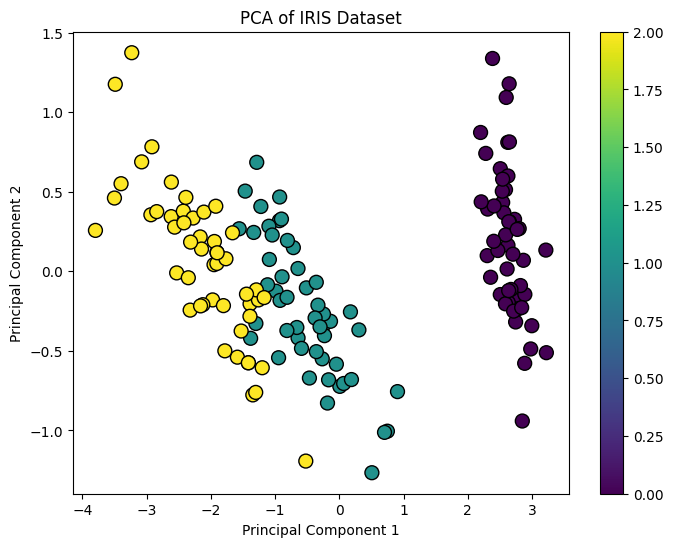

In [5]:
# Load the IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce the data to 2 dimensions
X_reduced, eigenvectors, X_mean = myPCA(X, 2)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS Dataset')
plt.colorbar()
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: ` Eigenfaces are a set of eigenvectors used in the computer vision problem of human face recognition. They are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of possible faces of human beings. Each eigenface represents a certain pattern in the face image, and faces can be approximated by a combination of these eigenfaces. PCA is used to compute these eigenfaces by finding the principal components of the face images, allowing for dimensionality reduction while preserving the most important features that contribute to face recognition.


### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [6]:
pip install opencv-python

In [7]:
from google.colab import files
import zipfile
import os

# Upload the dataset
uploaded = files.upload()

# Assuming the uploaded file is a zip file
zip_file_name = list(uploaded.keys())[0]

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('faces_data')

# Set the data directory path
data_dir = 'faces_data/ORL'

# Debugging: Check the directory structure
for root, dirs, files in os.walk(data_dir):
    print(root, "contains", len(files), "files")


Saving FacesDataset1.zip to FacesDataset1.zip
faces_data/ORL contains 0 files
faces_data/ORL/s15 contains 11 files
faces_data/ORL/s10 contains 11 files
faces_data/ORL/s7 contains 10 files
faces_data/ORL/s22 contains 10 files
faces_data/ORL/s13 contains 10 files
faces_data/ORL/s34 contains 10 files
faces_data/ORL/s39 contains 10 files
faces_data/ORL/s5 contains 11 files
faces_data/ORL/s20 contains 10 files
faces_data/ORL/s26 contains 10 files
faces_data/ORL/s37 contains 10 files
faces_data/ORL/s9 contains 11 files
faces_data/ORL/s18 contains 10 files
faces_data/ORL/s19 contains 11 files
faces_data/ORL/s6 contains 10 files
faces_data/ORL/s17 contains 10 files
faces_data/ORL/s8 contains 11 files
faces_data/ORL/s23 contains 10 files
faces_data/ORL/s25 contains 11 files
faces_data/ORL/s1 contains 11 files
faces_data/ORL/s38 contains 10 files
faces_data/ORL/s36 contains 10 files
faces_data/ORL/s24 contains 10 files
faces_data/ORL/s32 contains 10 files
faces_data/ORL/s3 contains 11 files
face

In [8]:
import cv2
import numpy as np

def read_faces_data(data_dir):
    X_train, X_test = [], []
    y_train, y_test = [], []

    for person in range(1, 41):
        person_dir = os.path.join(data_dir, f's{person}')
        if not os.path.exists(person_dir):
            print(f"Directory {person_dir} does not exist.")
            continue

        for img_num in range(1, 11):
            img_path = os.path.join(person_dir, f'{img_num}.bmp')
            if not os.path.exists(img_path):
                print(f"Image {img_path} does not exist.")
                continue

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Failed to read image {img_path}.")
                continue

            img_flatten = img.flatten()
            if img_num <= 5:
                X_train.append(img_flatten)
                y_train.append(person)
            else:
                X_test.append(img_flatten)
                y_test.append(person)

    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = read_faces_data(data_dir)

# Check if the data is loaded correctly
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing labels shape: {y_test.shape}')


Training data shape: (200, 2304)
Testing data shape: (200, 2304)
Training labels shape: (200,)
Testing labels shape: (200,)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [9]:
# Number of principal components to retain
num_components = 50

# Apply PCA on the training data
X_train_pca, eigenvectors, X_mean = myPCA(X_train, num_components)

# Transform the test data using the learned PCA components
X_test_centered = X_test - X_mean
X_test_pca = np.dot(X_test_centered, eigenvectors)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

# Train LDA on the PCA-transformed training data
lda = LDA()
lda.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = lda.predict(X_test_pca)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 92.00%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


Number of components: 40, Accuracy: 94.00%
Number of components: 50, Accuracy: 92.00%
Number of components: 60, Accuracy: 90.50%
Number of components: 70, Accuracy: 91.50%
Number of components: 80, Accuracy: 92.00%
Number of components: 90, Accuracy: 92.00%
Number of components: 100, Accuracy: 88.50%


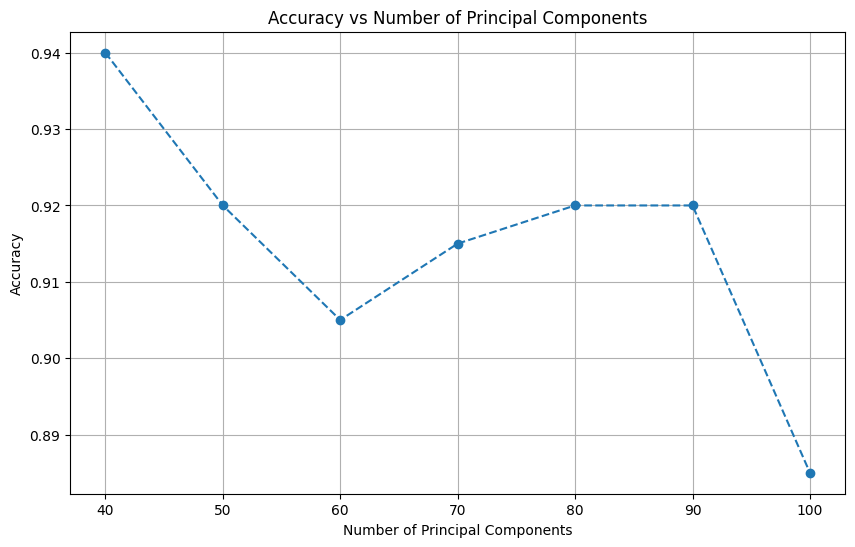

In [11]:

# Initialize a list to store accuracies
accuracies = []

# Loop over the number of components
for num_components in range(40, 101, 10):
    # Apply PCA on the training data
    X_train_pca, eigenvectors, X_mean = myPCA(X_train, num_components)

    # Project the test data onto the same principal components
    X_test_centered = X_test - X_mean
    X_test_pca = np.dot(X_test_centered, eigenvectors)

    # Train LDA on the PCA-transformed training data
    lda = LDA()
    lda.fit(X_train_pca, y_train)

    # Predict on the PCA-transformed test data
    y_pred = lda.predict(X_test_pca)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((num_components, accuracy))
    print(f'Number of components: {num_components}, Accuracy: {accuracy * 100:.2f}%')

# Plot the results
components, acc_values = zip(*accuracies)
plt.figure(figsize=(10, 6))
plt.plot(components, acc_values, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Principal Components')
plt.grid(True)
plt.show()

**Accuracy Trends:** As you vary the number of principal components from 100 to 40, the accuracy will likely show a trend. The accuracy might initially improve as you include more components, but after a certain point, adding more components may not significantly enhance accuracy.

**Sufficient Number of Features:** The plot will help identify the optimal number of components. If the accuracy plateaus or starts to decrease after a certain number of components, that indicates you've captured enough variance, and adding more components might introduce noise.

**Dimensionality Reduction:** The goal of PCA is to reduce dimensionality while preserving as much variance as possible. The results will show how effectively PCA has achieved this balance.

**Optimal Number of Components:** The results suggest that around 40 components are optimal for this dataset, providing the highest accuracy.

**Impact of Adding More Components:** Adding more components beyond the optimal number tends to introduce noise rather than useful variance, leading to decreased accuracy.

**Dimensionality Trade-off:** There's a trade-off in PCA between capturing sufficient variance and avoiding overfitting due to noise. The results indicate that the first 40 components capture the most meaningful variance for the classification task.